# Magnitude to Flux Conversion (J-Band Normalization)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math

#All zpt values are in Jy and go in the order: [U,B,V,I,J,H,K,3.6,4.5,5.8,8.0]
zpt=[1790,4063,3636,2416,1594,1024,666.7,280.9,179.7,115,64.13] 

#All lambdaEff values are in micrometers and go in the order: [U,B,V,I,J,H,K,3.6,4.5,5.8,8.0]
lambdaEff=[0.36,0.44,0.555,0.79,1.235,1.662,2.159,3.55,4.493,5.731,7.872]

#Scales lambdaEff values to meters
lambdaEff_Plot=[0.36e-6,0.44e-6,0.555e-6,0.79e-6,1.235e-6,1.662e-6,2.159e-6,3.55e-6,4.493e-6,5.731e-6,7.872e-6]

def calculate_flux(input_mag_array,zpt,star_number): 
    
# Takes an input of magnitude array and the number of stars in the file
# to calculate the flux and place those values into an array
# while maintaining the empty spaces as 99.999.

    output_flux = np.zeros((11,star_number))         
    for i in range(11):                              
        for j in range(star_number):
            if input_mag_array[i][j] == 99.999: 
                output_flux[i][j] = 99.999
            else:
                output_flux[i][j] = 10**(-input_mag_array[i][j]/2.5)*zpt[i]
    return output_flux

def lambdaEff_calc(input_flux_array,star_number):  
    
# Takes an input of the flux array and the number of stars in the file
# to multiply the flux values by their corresponding lambdaEff
# values and places those values into an array while maintaining
# the empty spaces as 99.999.    
    
    output_lambda_array = np.zeros((11,star_number)) 
    for i in range(11):                              
        for j in range(star_number):                 
            if input_flux_array[i][j] == 99.999:
                output_lambda_array[i][j] = 99.999
            else:
                output_lambda_array[i][j] = input_flux_array[i][j] * lambdaEff[i]
    return output_lambda_array

def normalize(input_fluxEff_array,star_number):  
    
# Takes an input of the flux array and the number of stars in the file 
# after it has been multiplied by the lambdaEff values and normalizes
# that flux array with respect to the array value corresponding with
# the J-Band. The empty spaces are still maintained as 99.999.

    output_normalized_array = np.zeros((11,star_number)) 
    for i in range(11):                                  
        for j in range(star_number):                     
            if (input_fluxEff_array[i][j]==99.999) or (input_fluxEff_array[4][j]==99.999):
                output_normalized_array[i][j] = 99.999
            else:
                output_normalized_array[i][j] = input_fluxEff_array[i][j]/input_fluxEff_array[4][j]
    return output_normalized_array
    
def normalize_avg(input_normalized_array,star_number):

# Takes an input of the normalized flux array and the number of stars in the file
# and takes the average of each array element, ignoring every 99.999 value.
# It then outputs the average normalized flux for each wavelength and the 
# corresponding standard deviation.

    output_normalized_avg = np.zeros(11)
    output_normalized_std = np.zeros(11)
    for i in range(11):
        output_normalized_avg[i] = np.mean(input_normalized_array[i][np.where(input_normalized_array[i]!= 99.999)])
        output_normalized_std[i] = np.std(input_normalized_array[i][np.where(input_normalized_array[i]!= 99.999)])
    return [output_normalized_avg , output_normalized_std]
                        
def flux_convert(file_name):
    
# Reads inputted data file to a set of variables which are then assigned to an array.
# The magnitude array is converted to flux, multiplied by its respective lambdaEff,
# normalized with respect to the J-band, and then averaged out for each wavelength.
# The average normalized flux array and its corresponding standard deviation is then
# outputted.

    a,b,c,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,mag36,mag45,mag58,mag80 = np.genfromtxt(file_name,unpack=True,delimiter=(18,) + (13,)*2 + 
                                                                                      (8,)*11,usecols=range(14),skip_header=3)

    input_mag_array=[Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,mag36,mag45,mag58,mag80]    
    
    star_number = len(input_mag_array[0])-1
    
    flux = calculate_flux(input_mag_array,zpt,star_number)
    
    lambdaEff_flux = lambdaEff_calc(flux,star_number)
    
    normal = normalize(lambdaEff_flux,star_number)
    
    normal_avg,normal_std = normalize_avg(normal,star_number)
    
    return [normal_avg,normal_std]

def file_save(output_file_name,wavelength,flux,std_dev):
    
# Inputs an assigned name for the file, the lamdbaEff array in meters,
# the desired average normalized flux array and its corresponding standard
# deviation. It then creates a properly formatted set of data for future
# use in template fitting.

    np.savetxt(output_file_name, np.c_[wavelength,flux,std_dev],
               header=' Wavelength              Normalized Flux        Standard Deviation')

## Graphs of J-band normalized SEDs for a range of different stellar classifications.

Text(0.5, 1.0, 'A Giants')

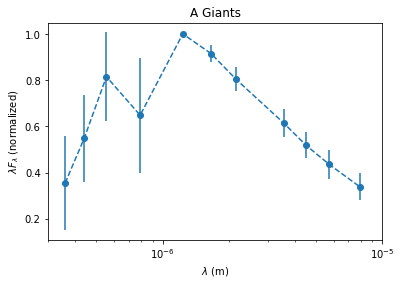

In [6]:
normalized_avg_A,normalized_std_A = flux_convert('A(asterisk) I,II,III.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_A,yerr=normalized_std_A,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('A Giants')

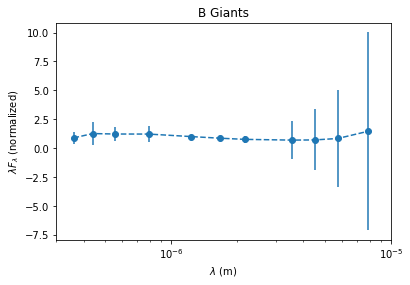

In [3]:
normalized_avg_B,normalized_std_B = flux_convert('B(asterisk) I,II,III.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_B,yerr=normalized_std_B,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('B Giants')

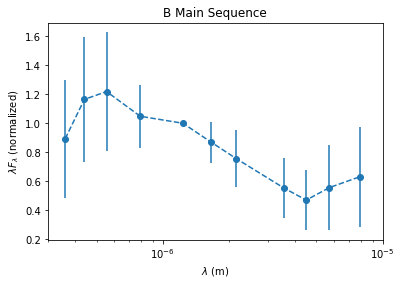

In [4]:
normalized_avg_BV,normalized_std_BV = flux_convert('B(asterisk) V(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_BV,yerr=normalized_std_BV,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('B Main Sequence')

Text(0.5, 1.0, 'Be Stars')

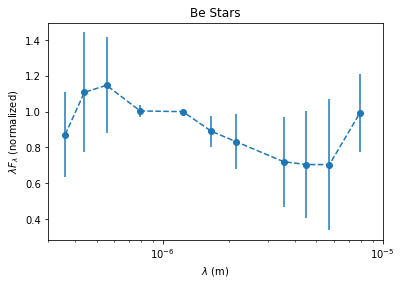

In [17]:
normalized_avg_Be,normalized_std_Be = flux_convert('Be(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_Be,yerr=normalized_std_Be,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('Be Stars')

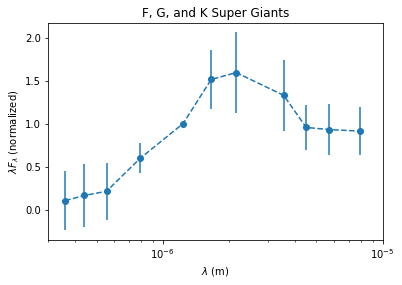

In [6]:
normalized_avg_FGK,normalized_std_FGK = flux_convert('F(asterisk),G(asterisk),K(asterisk) I,II,III.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_FGK,yerr=normalized_std_FGK,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('F, G, and K Super Giants')

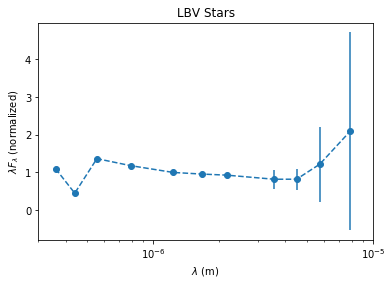

In [7]:
normalized_avg_LBV,normalized_std_LBV = flux_convert('LBV(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_LBV,yerr=normalized_std_LBV,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('LBV Stars')

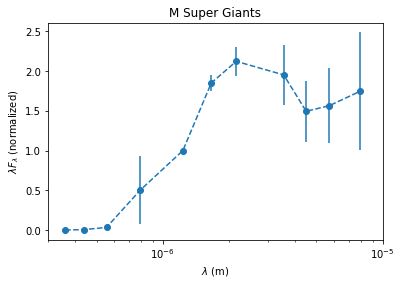

In [9]:
normalized_avg_M,normalized_std_M = flux_convert('M(asterisk)I,II,III.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_M,yerr=normalized_std_M,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('M Super Giants')

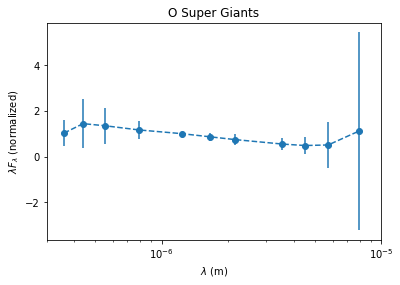

In [10]:
normalized_avg_O,normalized_std_O = flux_convert('O(asterisk) I,II,III.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_O,yerr=normalized_std_O,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('O Super Giants')

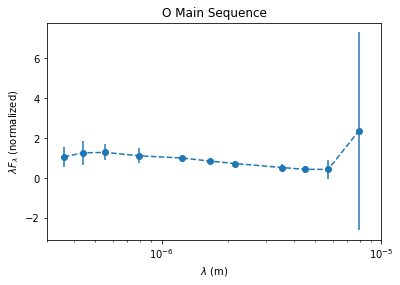

In [11]:
normalized_avg_OV,normalized_std_OV = flux_convert('O(asterisk) V(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_OV,yerr=normalized_std_OV,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('O Main Sequence')

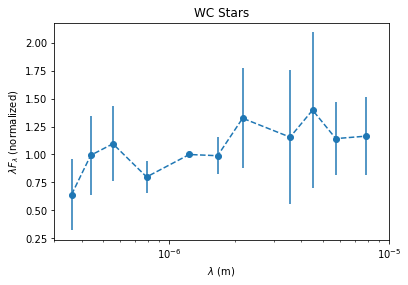

In [12]:
normalized_avg_WC,normalized_std_WC = flux_convert('WC(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_WC,yerr=normalized_std_WC,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('WC Stars')

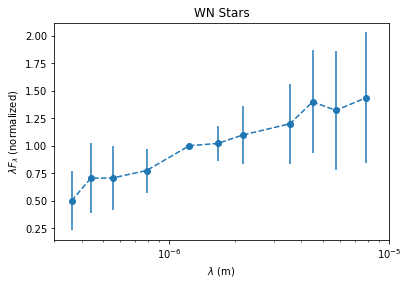

In [13]:
normalized_avg_WN,normalized_std_WN = flux_convert('WN(asterisk).txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_WN,yerr=normalized_std_WN,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('WN Stars')
#file_save('WN Stars Average.txt',lambdaEff_Plot,normalized_avg_WN,normalized_std_WN)

### Binary Star SEDs

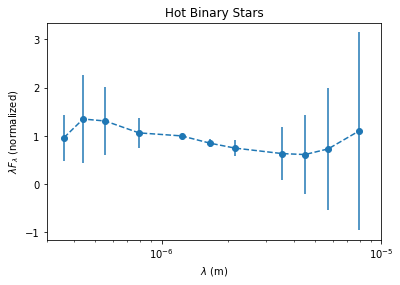

In [5]:
normalized_avg_HB,normalized_std_HB = flux_convert('Hot Binaries.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_HB,yerr=normalized_std_HB,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('Hot Binary Stars')
#file_save('Hot Binary Average.txt',lambdaEff_Plot,normalized_avg_HB,normalized_std_HB)

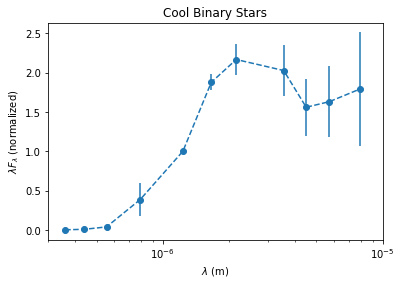

In [8]:
normalized_avg_CB,normalized_std_CB = flux_convert('Cool Binaries.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_CB,yerr=normalized_std_CB,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('Cool Binary Stars')

Text(0.5, 1.0, 'Xray Binary Stars')

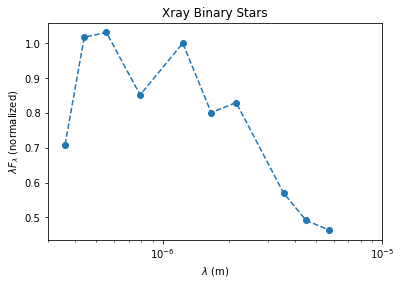

In [12]:
normalized_avg_XB,normalized_std_XB = flux_convert('Xray Binaries.txt')
plt.errorbar(lambdaEff_Plot,normalized_avg_XB,yerr=normalized_std_XB,fmt='--o')
plt.semilogx()
plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)')
plt.xlabel(r'$\lambda$ (m)')
plt.xlim(3e-7,1e-5)
plt.title('Xray Binary Stars')
#file_save('Xray Binary Average.txt',lambdaEff_Plot,normalized_avg_XB,normalized_std_XB)